# This code checks nans in the data
Originally written by 2022 SI team
- Lauren A. Bolotin; San Diego State University; lbolotin3468@sdsu.edu
- Francisco Haces-Garcia; University of Houston; fhacesgarcia@uh.edu
- Mochi Liao; Duke University; mochi.liao@duke.edu
- Qiyue Liu; University of Illinois at Urbana-Champaign; qiyuel3@illinois.edu

Modified by 
- Ryoko Araki (San Diego State University & UCSB, raraki8159@sdsu.edu) in 2023 SI


# Import libraries

In [50]:
import os
import numpy as np
import pandas as pd
import json
from tqdm import tqdm

# Define functions

In [51]:

def load_basin_list(basin_file):
    with open(basin_file, 'r') as file:
        lines = file.readlines()
    lines = [line.strip() for line in lines]
    return lines

def load_csv(file_path):
    return pd.read_csv(file_path)

def calc_nan_percentages_forcing(forcing_data, fields):
    return [len(np.where(np.isnan(forcing_data[field]))[0]) / len(forcing_data[field]) for field in fields]

def calc_nan_percentages_obs(obs_data):
    return len(np.where(np.isnan(obs_data['QObs(mm/h)'].values))[0]) / len(obs_data['QObs(mm/h)'])

def calc_indices(data, datetime):
    start_idx = np.where(data['date'] == datetime["start_datetime"])
    end_idx = np.where(data['date'] == datetime["end_datetime"])
    return start_idx, end_idx

def initialize_nan_check():
    keys = [
            'basin_id', 
            'spinup-for-calibration - pet', 'spinup-for-calibration - precip', 
            'spinup-for-testing - pet', 'spinup-for-testing - precip', 
            'calibration - pet', 'calibration - precip', 'calibration - usgs', 
            'testing - pet', 'testing - precip', 'testing - usgs'
            ]
    return {key: [] for key in keys}


# Get a stats on NaN data

In [53]:

def process_data(data_dir, obs_dir, forcing_path, time_split_file, output_dir):
    
    nan_check = initialize_nan_check()

    basin_list = load_basin_list(os.path.join(data_dir, 'basin_list_516.txt'))
    time_split = json.load(open(time_split_file, 'r'))

    for basin in tqdm(basin_list):
        nan_check[f'basin_id'].append(basin)
        
        obs_data = load_csv(os.path.join(obs_dir, f'{basin}-usgs-hourly.csv'))
        forcing_data = load_csv(os.path.join(forcing_path, f'{basin}_hourly_nldas.csv'))

        for phase, fields in time_split.items():
            
            # Forcing 
            start_idx_forcing, end_idx_forcing = calc_indices(forcing_data, fields)
            if start_idx_forcing[0].size == 0 or end_idx_forcing[0].size == 0: 
                print(f"none or missing forcing data for {phase} period")
                nan_perc = [1, 1]
            else:
                sliced_forcing_data = forcing_data.iloc[start_idx_forcing[0][0]:end_idx_forcing[0][0]+1,:]
                nan_perc = calc_nan_percentages_forcing(sliced_forcing_data, ['potential_evaporation', 'total_precipitation'])
            
            nan_check[f'{phase} - pet'].append(nan_perc[0])
            nan_check[f'{phase} - precip'].append(nan_perc[1])
            
            if "spinup" not in phase:
                # Observation
                start_idx_obs, end_idx_obs = calc_indices(obs_data, fields)
                if start_idx_obs[0].size == 0 or end_idx_obs[0].size == 0: 
                    print(f"none or missing observation data for {phase} period")
                    nan_perc_obs = 1
                else:
                    sliced_obs_data = obs_data.iloc[start_idx_obs[0][0]:end_idx_obs[0][0]+1,:]
                    nan_perc_obs = calc_nan_percentages_obs(sliced_obs_data)
                nan_check[f'{phase} - usgs'].append(nan_perc_obs)

    df = pd.DataFrame(nan_check)
    df.to_csv(os.path.join(output_dir, "check_for_nan_in_data_hourly.csv"))

data_dir = os.path.join('..', 'data', 'camels', 'gauch_etal_2020')
obs_dir = os.path.join(data_dir, 'usgs_streamflow')
forcing_path = os.path.join(data_dir, 'nldas_hourly')
time_split_file = os.path.join('..', 'data', 'model_common_configs', 'cal-val-test-period.json')
output_dir = data_dir

process_data(data_dir, obs_dir, forcing_path, time_split_file, output_dir)



  0%|          | 0/516 [00:00<?, ?it/s]

 11%|█         | 57/516 [01:09<08:54,  1.17s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 11%|█         | 58/516 [01:10<08:21,  1.10s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 12%|█▏        | 60/516 [01:12<08:11,  1.08s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 37%|███▋      | 193/516 [03:51<06:28,  1.20s/it]

none or missing observation data for calibration period


 66%|██████▌   | 338/516 [06:51<04:28,  1.51s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 66%|██████▌   | 340/516 [06:53<03:38,  1.24s/it]

none or missing observation data for testing period


 66%|██████▋   | 343/516 [06:56<03:14,  1.13s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 68%|██████▊   | 351/516 [07:07<04:06,  1.50s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 70%|██████▉   | 359/516 [07:16<02:48,  1.07s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 70%|██████▉   | 361/516 [07:18<02:43,  1.06s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 70%|███████   | 362/516 [07:20<02:56,  1.14s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 71%|███████   | 365/516 [07:24<03:25,  1.36s/it]

none or missing observation data for calibration period
none or missing observation data for testing period


 98%|█████████▊| 504/516 [10:35<00:13,  1.13s/it]R:\Temp\ipykernel_20872\1643869719.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)
100%|██████████| 516/516 [10:49<00:00,  1.26s/it]


# Get the list of basins with missing data

In [56]:
# df is the DataFrame obtained from your code

nan_stats = pd.read_csv(os.path.join(output_dir, "check_for_nan_in_data_hourly.csv"))

threshold = 0.5 # set the threshold
mask = (nan_stats.iloc[:, 2:] > threshold).any(axis=1)  # filter the DataFrame, ignore the 'basin id' column
basin_ids = nan_stats.loc[mask, 'basin_id'].tolist()  # get the 'basin id' of the rows that meet the condition
basin_ids
print(basin_ids)
print(len(basin_ids))


[1552000, 1552500, 1567500, 3338780, 5120500, 6746095, 7301410, 7315700, 7346045, 8050800, 8101000, 8104900, 8109700, 8158810, 9386900, 12375900]
16


<AxesSubplot:>

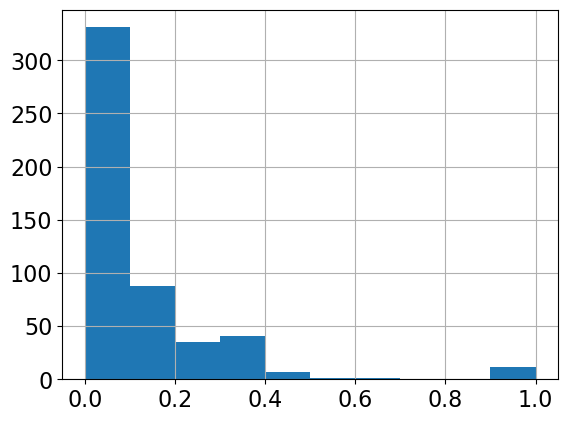

In [59]:
hist_cal = nan_stats['calibration - usgs'].hist()


# Save the list as a text file

In [57]:
sorted_id_list = sorted(basin_ids)
output_file = os.path.join(output_dir, 'basin_list_missing_data_v2023.txt')
with open(output_file, 'w') as file:
    for item in sorted_id_list:
        file.write("%s\n" % item)

# (Skip this, just for testing)
# Actually plotting a few timeseries

In [25]:
obs_dir = os.path.join(data_dir, 'usgs_streamflow')
obs_data = pd.read_csv(r'G:\Shared drives\SI_NextGen_Aridity\data\camels\gauch_etal_2020\usgs_streamflow\01022500-usgs-hourly.csv')
obs_data.head()

,date,QObs(mm/h),QObs count,qualifiers,utcoffset(h),(iv-camels)/camels,QObs_CAMELS(mm/h)
0,1989-10-01 04:00:00,0.027234,3,A [92]/A [92]/A [92],-4.0,-0.00989,0.025846
1,1989-10-01 05:00:00,0.027234,4,A [92]/A [92]/A [92]/A [92],-4.0,-0.00989,0.025846
2,1989-10-01 06:00:00,0.026887,4,A [92]/A [92]/A [92]/A [92],-4.0,-0.00989,0.025846
3,1989-10-01 07:00:00,0.026887,4,A [92]/A [92]/A [92]/A [92],-4.0,-0.00989,0.025846
4,1989-10-01 08:00:00,0.026887,4,A [92]/A [92]/A [92]/A [92],-4.0,-0.00989,0.025846


In [28]:
obs_data.set_index(pd.to_datetime(obs_data['date']), inplace=True)

<AxesSubplot:xlabel='date'>

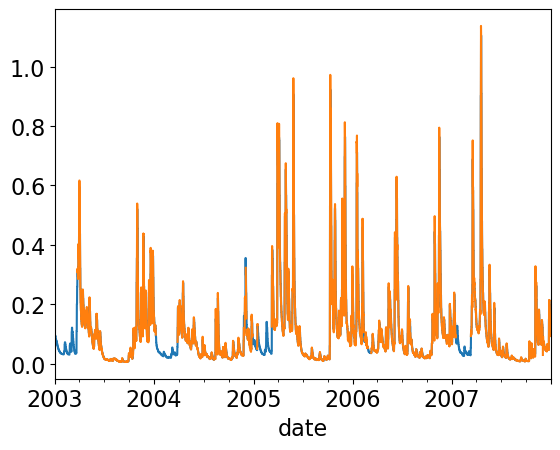

In [35]:

obs_data['QObs_CAMELS(mm/h)']['2003-01-01':'2007-12-31'].plot()
obs_data['QObs(mm/h)']['2003-01-01':'2007-12-31'].plot()


<AxesSubplot:xlabel='date'>

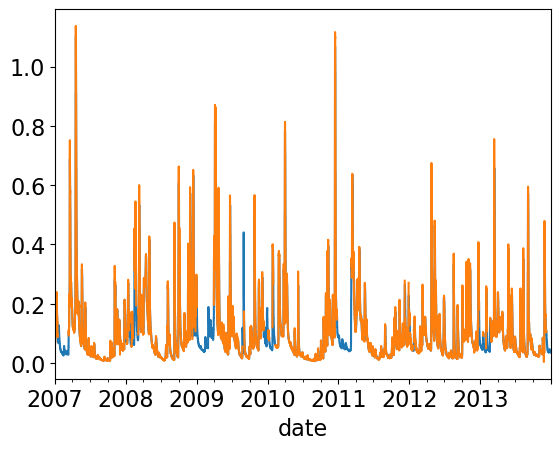

In [36]:
obs_data['QObs_CAMELS(mm/h)']['2007-01-01':'2013-12-31'].plot()
obs_data['QObs(mm/h)']['2007-01-01':'2013-12-31'].plot()